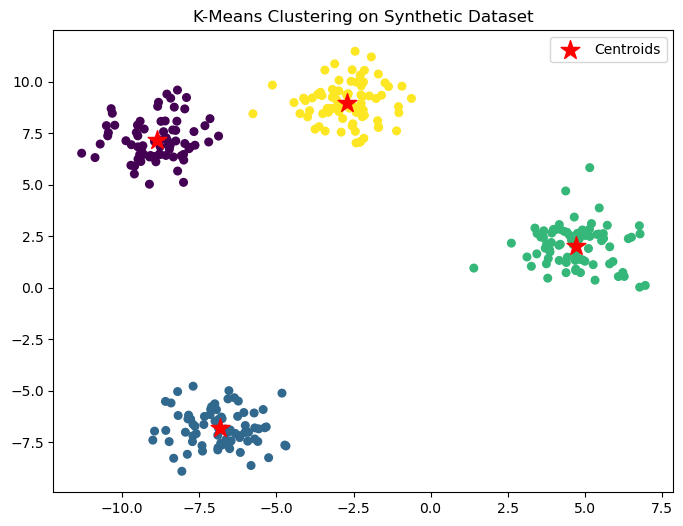

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


X, y_true = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=1.0,
    random_state=42
)


class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        n_samples, n_features = X.shape

        
        random_idx = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_idx]

        for _ in range(self.max_iters):
            
            labels = self._assign_clusters(X)

            
            new_centroids = np.array([
                X[labels == i].mean(axis=0) for i in range(self.k)
            ])

            
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

        self.labels_ = labels

    def _assign_clusters(self, X):
        distances = np.linalg.norm(
            X[:, np.newaxis] - self.centroids, axis=2
        )
        return np.argmin(distances, axis=1)


kmeans = KMeans(k=4)
kmeans.fit(X)


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=30)
plt.scatter(
    kmeans.centroids[:, 0],
    kmeans.centroids[:, 1],
    c='red',
    s=200,
    marker='*',
    label='Centroids'
)
plt.title("K-Means Clustering on Synthetic Dataset")
plt.legend()
plt.show()


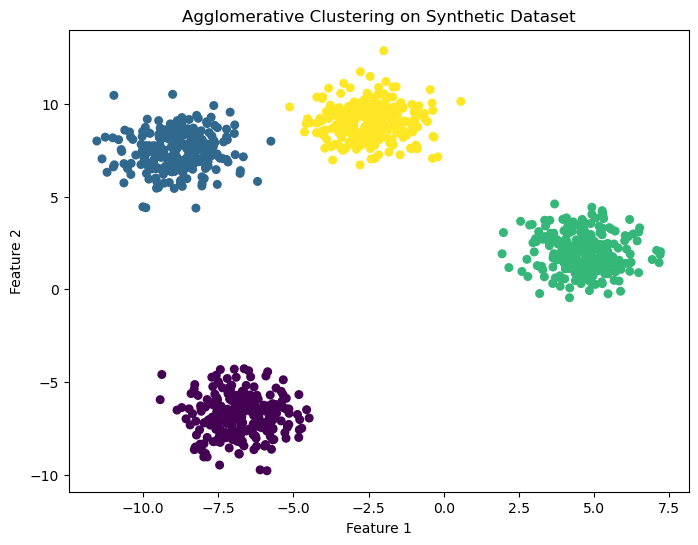

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering


X, y_true = make_blobs(
    n_samples=1000,
    centers=4,
    cluster_std=1.0,
    random_state=42
)


agglo = AgglomerativeClustering(
    n_clusters=4,
    linkage='ward'
)

labels = agglo.fit_predict(X)


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=30)
plt.title("Agglomerative Clustering on Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


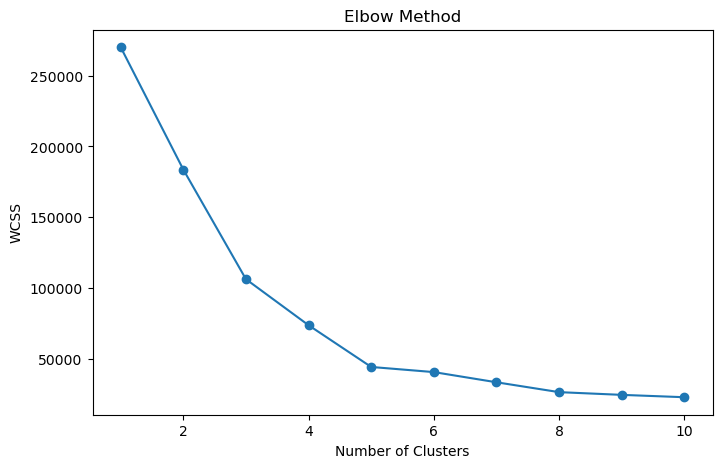

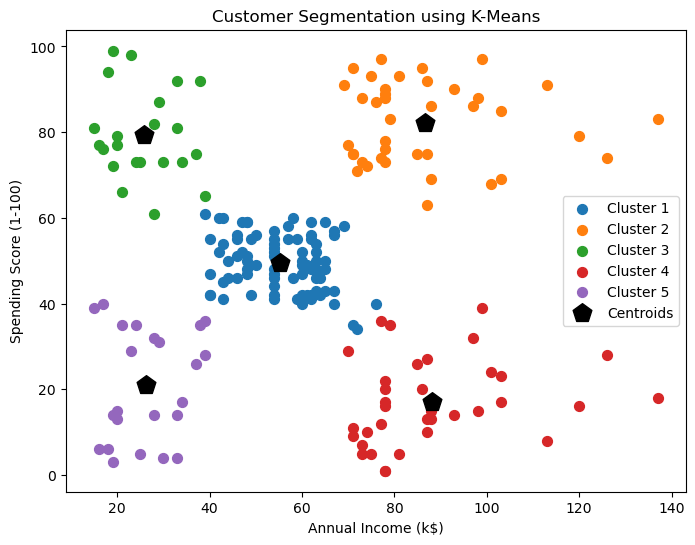

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
data = pd.read_csv("Mall_Customers.csv")


X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s=50, label='Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s=50, label='Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s=50, label='Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s=50, label='Cluster 4')
plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1], s=50, label='Cluster 5')


plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c='black',
    marker='p',
    label='Centroids'
)

plt.title("Customer Segmentation using K-Means")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogroutam, linkage
data = pd.read_csv("penguins.csv")


data = data.dropna()


X = data[['bill_length_mm', 'flipper_length_mm']]

linked = linkage(X, method='ward')


plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Dendrogram for Penguins Dataset")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

agglo = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)

labels = agglo.fit_predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[labels == 0, 0], X.iloc[labels == 0, 1],
            c='red', label='Cluster 1')
plt.scatter(X.iloc[labels == 1, 0], X.iloc[labels == 1, 1],
            c='green', label='Cluster 2')
plt.scatter(X.iloc[labels == 2, 0], X.iloc[labels == 2, 1],
            c='blue', label='Cluster 3')

plt.title("Agglomerative Clustering of Penguins")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Flipper Length (mm)")
plt.legend()
plt.show()


ImportError: cannot import name 'dendrogroutam' from 'scipy.cluster.hierarchy' (/opt/anaconda3/lib/python3.13/site-packages/scipy/cluster/hierarchy.py)

In [2]:
pip install pyECLAT

/opt/anaconda3/lib/python3.13/pty.py:95: DeprecationWarning: This process (pid=9002) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder


df = pd.read_csv("transactions.csv")


transactions = df['Items'].apply(lambda x: x.split(','))


transactions = transactions.tolist()


te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

print(df_encoded.head())
from mlxtend.frequent_patterns import apriori, association_rules


frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)


rules = association_rules(frequent_itemsets,
                          metric="confidence",
                          min_threshold=0.6)

print("Frequent Itemsets:\n", frequent_itemsets)
print("\nAssociation Rules:\n", rules[['antecedents','consequents','support','confidence','lift']])
from mlxtend.frequent_patterns import fpgrowth


fp_itemsets = fpgrowth(df_encoded, min_support=0.2, use_colnames=True)


fp_rules = association_rules(fp_itemsets,
                             metric="confidence",
                             min_threshold=0.6)

print("FP-Growth Itemsets:\n", fp_itemsets)
print("\nFP-Growth Rules:\n", fp_rules[['antecedents','consequents','support','confidence','lift']])
from itertools import combinations

def eclat(prefix, items, min_support, freq_itemsets):
    while items:
        item, tidset = items.pop()
        support = len(tidset) / len(transactions)

        if support >= min_support:
            freq_itemsets.append((prefix + [item], support))

            suffix = []
            for other_item, other_tidset in items:
                new_tidset = tidset.intersection(other_tidset)
                if len(new_tidset) / len(transactions) >= min_support:
                    suffix.append((other_item, new_tidset))

            eclat(prefix + [item], suffix, min_support, freq_itemsets)

    return freq_itemsets



item_tidset = {}
for tid, transaction in enumerate(transactions):
    for item in transaction:
        if item not in item_tidset:
            item_tidset[item] = set()
        item_tidset[item].add(tid)

items = list(item_tidset.items())


min_support = 0.2
frequent_eclat = eclat([], items, min_support, [])

print("ECLAT Frequent Itemsets:")
for itemset, support in frequent_eclat:
    print(itemset, "Support:", support)


    Beer  Bread  Butter  Cereal  Chips   Coke  Diaper   Eggs    Jam  Juice  \
0  False   True   False   False  False  False   False  False  False  False   
1   True  False   False   False  False  False    True   True  False  False   
2  False   True    True   False  False  False   False  False  False  False   
3  False   True    True   False  False  False   False  False  False  False   
4   True  False   False   False  False  False    True  False  False  False   

    Milk  
0   True  
1   True  
2  False  
3   True  
4  False  
Frequent Itemsets:
    support         itemsets
0     0.30           (Beer)
1     0.60          (Bread)
2     0.25         (Butter)
3     0.20         (Cereal)
4     0.30         (Diaper)
5     0.60           (Milk)
6     0.25   (Diaper, Beer)
7     0.25  (Butter, Bread)
8     0.40    (Milk, Bread)
9     0.20   (Diaper, Milk)

Association Rules:
   antecedents consequents  support  confidence      lift
0    (Diaper)      (Beer)     0.25    0.833333  2.777778
1 